<a href="https://colab.research.google.com/github/Chetan613/Rock-Mine-Detection/blob/main/Copy_of_rock_mine_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Vs Mine Prediction Using Sonar Data

**Importing the Libraries** like Numpy, Scikit Learn and Pandas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Collection of Data and its Processing:** (the dataset taken into consideration has no header)

In [ ]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/sonar_data.csv', header = None)

In [ ]:
#display first 5 rows from the dataset
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and columns in the dataset
sonar_data.shape

(208, 61)

In [ ]:
#statistical measures of the data: count, mean, standard deviation, minimum value, maximum value and percentage value of the data etc.
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Find the **count of Rocks and Mines** which is specified at 60th column.

In [ ]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


Here, **M** indicates **Mine** and
**R** indicates **Rock**


In [ ]:
#grouping the data by mine and rock
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
#separating data and labels
X = sonar_data.drop(columns = 60, axis = 1)
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

**Training and Testing Data**

Model: K-Nearest Neighbors
Accuracy: 0.8095238095238095
Classification Report:
              precision    recall  f1-score   support

           M       0.77      0.91      0.83        11
           R       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21

Confusion Matrix:
[[10  1]
 [ 3  7]]

Model: Decision Tree
Accuracy: 0.8095238095238095
Classification Report:
              precision    recall  f1-score   support

           M       0.89      0.73      0.80        11
           R       0.75      0.90      0.82        10

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21

Confusion Matrix:
[[8 3]
 [1 9]]

Model: Random Forest
Accuracy: 0.7619047619047619
Classification Report:
              precision    recall  f1-score   sup

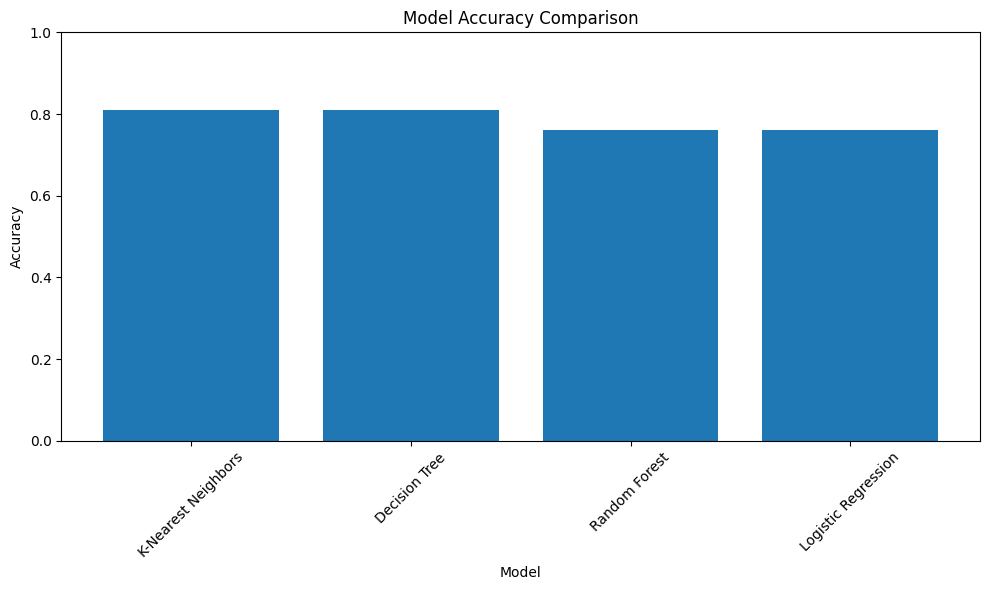

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'sonar_data' is a Pandas DataFrame containing the sonar data
# If not, replace this with the actual loading or creation of the DataFrame
# sonar_data = pd.read_csv('sonar_data.csv')  # Example: loading from CSV

# Separate features (X) and labels (Y)
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

# Initialize the models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)

    # Generate classification report and confusion matrix
    report = classification_report(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    results.append([model_name, accuracy, report, cm])

# Create a DataFrame from the results (excluding confusion matrices for now)
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Classification Report", "Confusion Matrix"])

# Print the classification reports and confusion matrices
for index, row in results_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Accuracy: {row['Accuracy']}")
    print(f"Classification Report:\n{row['Classification Report']}")
    print(f"Confusion Matrix:\n{row['Confusion Matrix']}\n")

# Plot the comparison graph (accuracy only)
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis limits for accuracy (0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Model Training Using Logistic Regression**

**Model Evaluation**

**Making a Predictive Sysem**

## Precision Comparison Chart

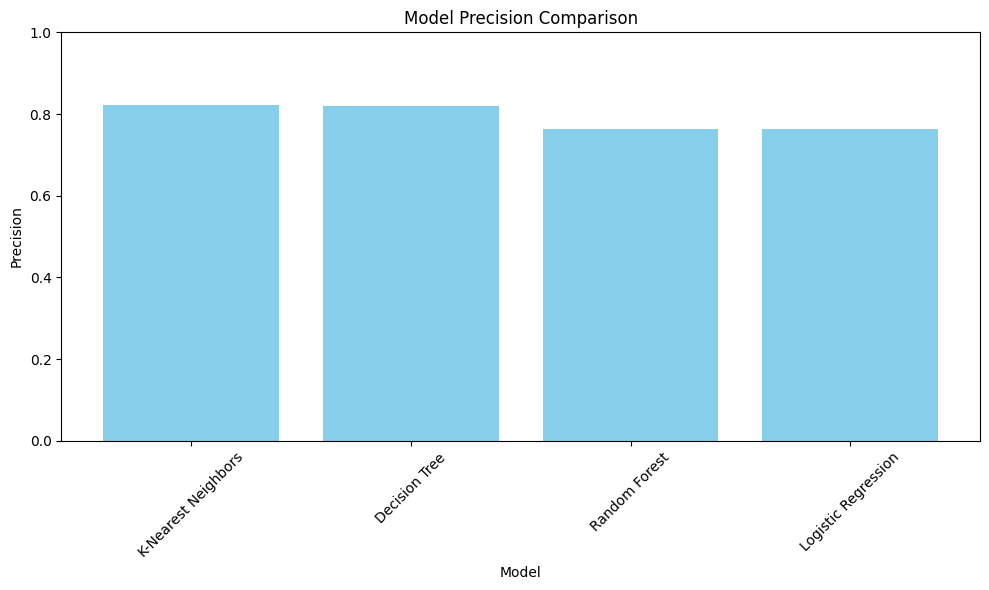

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the sonar data from the CSV file (assuming header is not present in the dataset)
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)

# Separate features (X) and labels (Y)
X = sonar_data.drop(columns=60, axis=1)  # Features (columns 0 to 59)
Y = sonar_data[60]  # Labels (column 60)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

# Initialize the models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
precision_scores = []
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # Extract precision score for class 'R' (Rock) and 'M' (Mine), and average the two
    precision = (report['R']['precision'] + report['M']['precision']) / 2
    precision_scores.append([model_name, precision])

# Create a DataFrame from the precision scores
precision_df = pd.DataFrame(precision_scores, columns=["Model", "Precision"])

# Plot the precision comparison graph
plt.figure(figsize=(10, 6))
plt.bar(precision_df["Model"], precision_df["Precision"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Model Precision Comparison")
plt.ylim(0, 1)  # Set y-axis limits for precision (0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Recall Comparison Chart

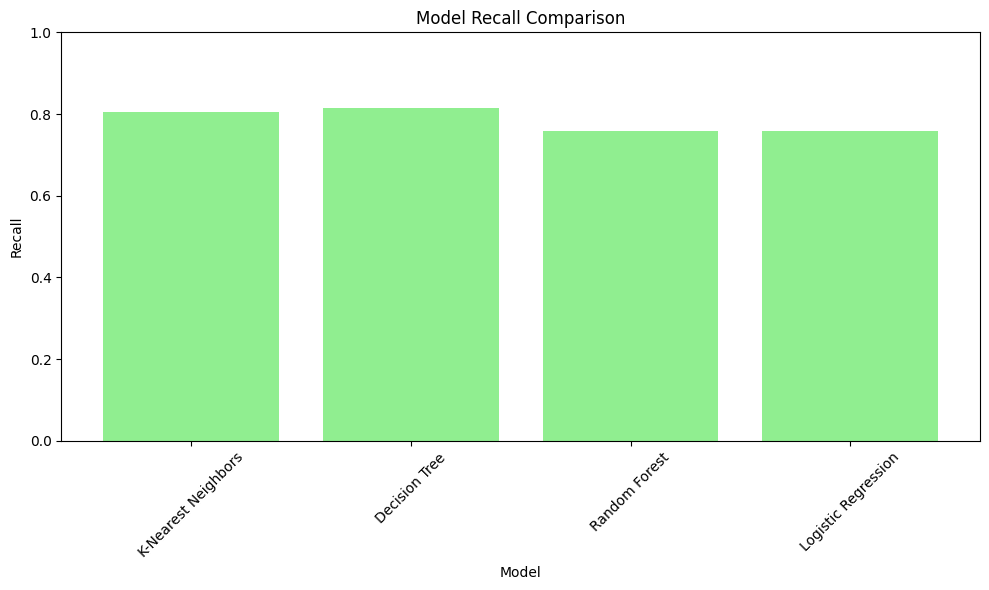

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the sonar data from the CSV file (assuming header is not present in the dataset)
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)

# Separate features (X) and labels (Y)
X = sonar_data.drop(columns=60, axis=1)  # Features (columns 0 to 59)
Y = sonar_data[60]  # Labels (column 60)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

# Initialize the models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
recall_scores = []
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # Extract recall score for class 'R' (Rock) and 'M' (Mine), and average the two
    recall = (report['R']['recall'] + report['M']['recall']) / 2
    recall_scores.append([model_name, recall])

# Create a DataFrame from the recall scores
recall_df = pd.DataFrame(recall_scores, columns=["Model", "Recall"])

# Plot the recall comparison graph
plt.figure(figsize=(10, 6))
plt.bar(recall_df["Model"], recall_df["Recall"], color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Model Recall Comparison")
plt.ylim(0, 1)  # Set y-axis limits for recall (0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## F1 Score Comparison Chart

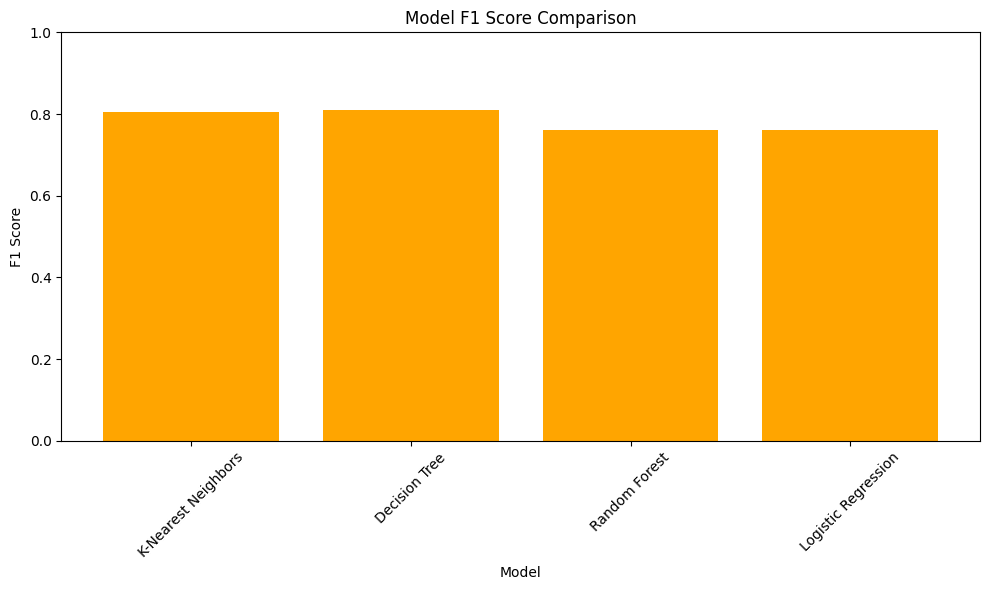

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the sonar data from the CSV file (assuming header is not present in the dataset)
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)

# Separate features (X) and labels (Y)
X = sonar_data.drop(columns=60, axis=1)  # Features (columns 0 to 59)
Y = sonar_data[60]  # Labels (column 60)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

# Initialize the models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
f1_scores = []
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # Extract F1 score for class 'R' (Rock) and 'M' (Mine), and average the two
    f1_score = (report['R']['f1-score'] + report['M']['f1-score']) / 2
    f1_scores.append([model_name, f1_score])

# Create a DataFrame from the F1 scores
f1_df = pd.DataFrame(f1_scores, columns=["Model", "F1 Score"])

# Plot the F1 score comparison graph
plt.figure(figsize=(10, 6))
plt.bar(f1_df["Model"], f1_df["F1 Score"], color='orange')
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.ylim(0, 1)  # Set y-axis limits for F1 score (0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
